In [18]:
import gzip
import numpy as np
from matplotlib import pyplot as plt 

f = gzip.open('datasets/mnist/train-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(28 * 28 * 60000)
X_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [10]:
f = gzip.open('datasets/mnist/train-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(60000)
Y_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
Y_train = Y_train.reshape(60000)
Y_train.shape

(60000,)

In [17]:
f = gzip.open('datasets/mnist/t10k-images-idx3-ubyte.gz','r')
f.read(16)
buf = f.read(28 * 28* 10000)
X_test_resized = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
X_test_resized = X_test_resized.reshape(10000, 28 * 28)
X_test_resized.shape

(10000, 784)

In [14]:
f = gzip.open('datasets/mnist/t10k-labels-idx1-ubyte.gz','r')
f.read(8)
buf = f.read(10000)
Y_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
Y_test = Y_test.reshape(10000)
Y_test.shape

(10000,)

## Accuracy Score for MNB

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()
clf_mnb = mnb.fit(X_train, Y_train)
y_pred = clf_mnb.predict(X_test_resized)
print('AUC: %0.5f' % accuracy_score(Y_test, y_pred))

AUC: 0.83650


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [46]:
%time
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
lr = LogisticRegression(n_jobs=-1,
                       random_state = 0,
                       tol = 0.1,
                       max_iter = 1000)
clf_lr = lr.fit(X_train_scaled, Y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


In [47]:
X_test_scaled = scaler.transform(X_test_resized)

## Accuracy score for LR

In [48]:
y_pred_lr = clf_lr.predict(X_test_scaled)
print('AUC: %0.5f' % accuracy_score(Y_test, y_pred_lr))

AUC: 0.92110


## Confusion Matrix for NB

<AxesSubplot:>

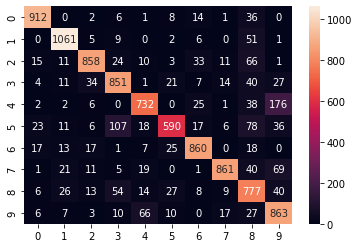

In [41]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred),annot=True,fmt="g")

## Confusion Matrix for LR

<AxesSubplot:>

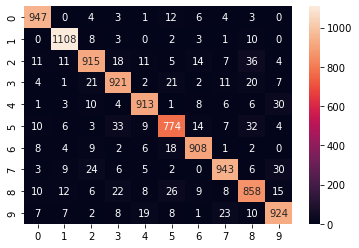

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred_lr),annot=True,fmt="g")

In [51]:
import pickle
pickle.dump(clf_mnb,open("nb.model","wb"))
pickle.dump(clf_lr,open("lr.model","wb"))